In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


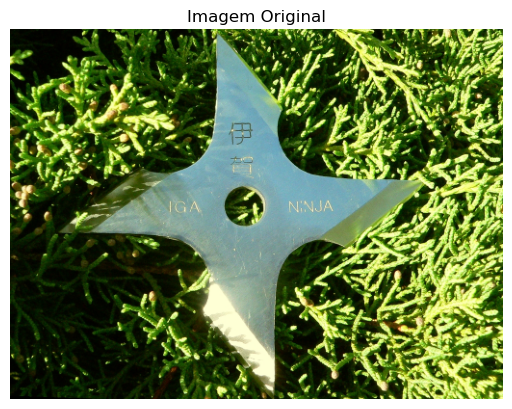

In [3]:
img = cv.imread("../src/Ninja_Shuriken.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Questão 1

In [4]:
# Função para criar uma janela de trackbars
def empty(a):
    pass

# +==+==+==+==+==+ Color Detection +==+==+==+==+==+ //
hMin = 0
sMin = 0
vMin = 0
hMax = 179
sMax = 255
vMax = 255

# Converte a imagem para o espaço de cor HSV
imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Cria a janela com trackbars
cv.namedWindow("Trackbars", cv.WINDOW_NORMAL)
cv.createTrackbar("Hue Min", "Trackbars", hMin, 179, empty)
cv.createTrackbar("Hue Max", "Trackbars", hMax, 179, empty)
cv.createTrackbar("Sat Min", "Trackbars", sMin, 255, empty)
cv.createTrackbar("Sat Max", "Trackbars", sMax, 255, empty)
cv.createTrackbar("Val Min", "Trackbars", vMin, 255, empty)
cv.createTrackbar("Val Max", "Trackbars", vMax, 255, empty)

while True:
    # Atualiza os valores dos trackbars
    hMin = cv.getTrackbarPos("Hue Min", "Trackbars")
    hMax = cv.getTrackbarPos("Hue Max", "Trackbars")
    sMin = cv.getTrackbarPos("Sat Min", "Trackbars")
    sMax = cv.getTrackbarPos("Sat Max", "Trackbars")
    vMin = cv.getTrackbarPos("Val Min", "Trackbars")
    vMax = cv.getTrackbarPos("Val Max", "Trackbars")

    # Define os limites inferior e superior da máscara
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Cria a máscara que destaca as cores dentro do intervalo definido
    mask = cv.inRange(imgHSV, lower, upper)

    # Mostra as imagens: original, HSV e a máscara
    cv.imshow("Image", img)
    cv.imshow("Image HSV", imgHSV)
    cv.imshow("Image Mask", mask)

    # Saída do loop com tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Fecha as janelas
cv.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kaio/.local/lib/python3.10/site-packages/cv2/qt/plugins"


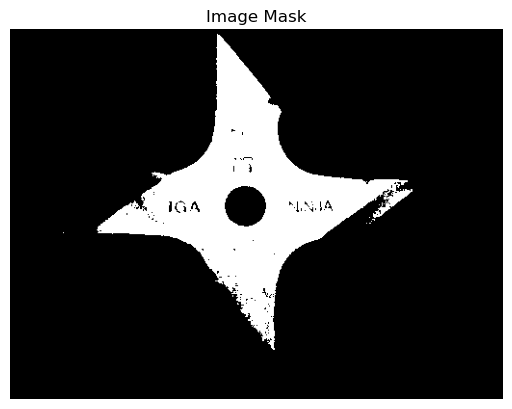

In [5]:
lower = np.array([51, 0, 0])
upper = np.array([165, 122, 255])
mask = cv.inRange(imgHSV, lower, upper)


plt.imshow(mask, cmap='gray')
plt.title('Image Mask')
plt.axis('off')
plt.show()

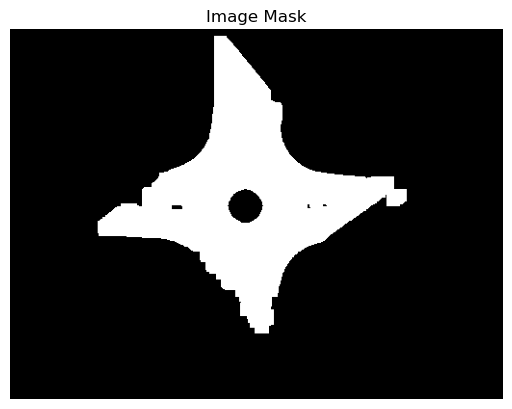

In [6]:
kernel = np.ones((3, 3), np.uint8)
kernel_ = np.ones((5, 5), np.uint8)

mask = cv.erode(mask, kernel, iterations=3)
mask = cv.dilate(mask, kernel_, iterations=3)

plt.imshow(mask, cmap='gray')
plt.title('Image Mask')
plt.axis('off')
plt.show()

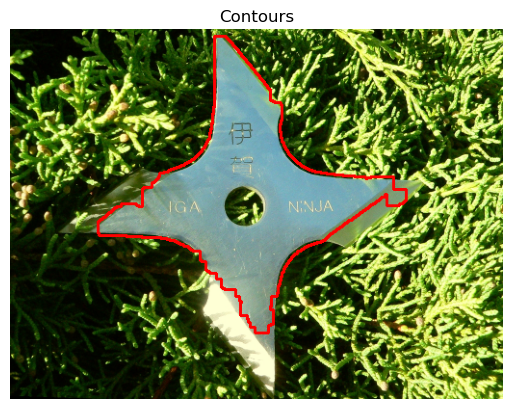

In [7]:
img_copy = img.copy()

contours, hierarchy = cv.findContours(mask ,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img_copy, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contours, cmap='gray')
plt.title('Contours')
plt.axis('off')
plt.show()

# Questão 2

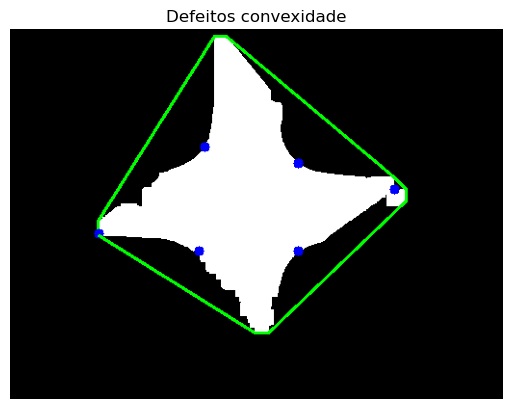

In [8]:
new_mask = np.zeros_like(img)
img_mask = cv.drawContours(new_mask, [contours[0]], -1, (255, 255, 255), thickness=cv.FILLED)
img_convex = img_mask.copy()

# Encontrar a casca convexa
hull = cv.convexHull(contours[0], returnPoints=False)

# Encontrar os defeitos de convexidade
defects = cv.convexityDefects(contours[0], hull)

# Desenhar a casca convexa
hull_points = cv.convexHull(contours[0])
cv.drawContours(img_convex, [hull_points], -1, (0, 255, 0), 2)

# Se existirem defeitos de convexidade
if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start = tuple(contours[0][s][0])
        end = tuple(contours[0][e][0])
        far = tuple(contours[0][f][0])

        cv.line(img_convex, start, end, (0, 255, 0), 2)

        cv.circle(img_convex, far, 5, (0, 0, 255), -1)

# Mostrar a imagem resultante
plt.imshow(img_convex)
plt.title('Defeitos convexidade')
plt.axis('off')
plt.show()


# Questão 3

Grau de Similaridade: 9.325873406851315e-15


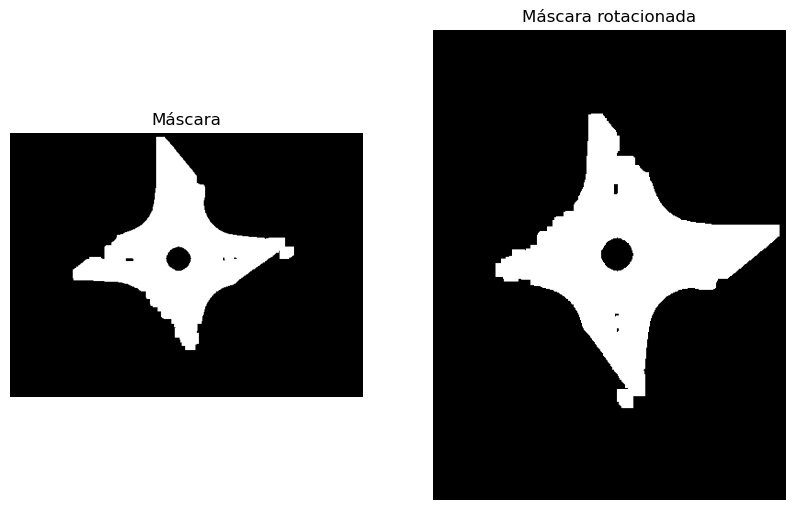

In [10]:
img_rotated = cv.rotate(mask, cv.ROTATE_90_CLOCKWISE)

contours_rot, hierarchy = cv.findContours(img_rotated ,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

similarity = cv.matchShapes(contours[0], contours_rot[0], cv.CONTOURS_MATCH_I1, 0)

print(f"Grau de Similaridade: {similarity}")

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_rotated, cmap='gray')
plt.title('Máscara rotacionada')
plt.axis('off')

plt.show()


# Questão 4

Grau de Similaridade: 0.2867674696003276


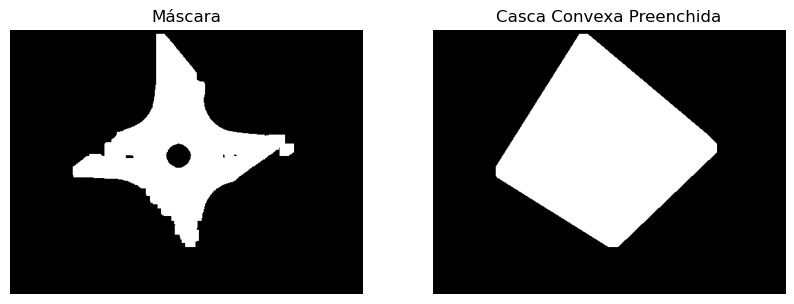

In [13]:
# Encontrar o maior contorno na imagem original
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# Encontrar a casca convexa do contorno
hull = cv.convexHull(contour)

# Converter os pontos da casca convexa para o tipo int32
hull = hull.astype(np.int32)

# Criar uma imagem preta com as mesmas dimensões da original
black_image = np.zeros_like(mask)

# Desenhar o polígono da casca convexa na imagem preta
cv.fillConvexPoly(black_image, hull, 255)

# Obter o contorno do polígono desenhado
contours_hull, hierarchy_hull = cv.findContours(black_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Calcular a similaridade entre o contorno original e o contorno da casca convexa
similarity = cv.matchShapes(contours[0], contours_hull[0], cv.CONTOURS_MATCH_I1, 0)

# Exibir o grau de similaridade
print(f"Grau de Similaridade: {similarity}")

# Mostrar as imagens
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.axis('off')

plt.subplot(122)
plt.imshow(black_image, cmap='gray')
plt.title('Casca Convexa Preenchida')
plt.axis('off')

plt.show()


# Questão 5

Grau de Similaridade: 0.24908914205509292


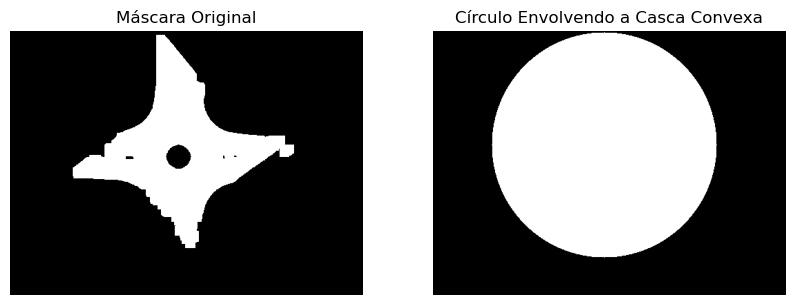

In [14]:
# Encontrar o maior contorno na imagem original
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour = contours[0]

# Encontrar a casca convexa do contorno
hull = cv.convexHull(contour)

# Encontrar o círculo mínimo que circunscreve a casca convexa
(x, y), radius = cv.minEnclosingCircle(hull)
center = (int(x), int(y))
radius = int(radius)

# Criar uma imagem preta com as mesmas dimensões da original
black_image = np.zeros_like(mask)

# Desenhar o círculo mínimo que circunscreve a casca convexa
cv.circle(black_image, center, radius, 255, -1)  # -1 preenche o círculo

# Obter o contorno do círculo desenhado
contours_circle, hierarchy_circle = cv.findContours(black_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Calcular a similaridade entre o contorno original e o contorno do círculo
similarity = cv.matchShapes(contours[0], contours_circle[0], cv.CONTOURS_MATCH_I1, 0)

# Exibir o grau de similaridade
print(f"Grau de Similaridade: {similarity}")

# Mostrar as imagens
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(black_image, cmap='gray')
plt.title('Círculo Envolvendo a Casca Convexa')
plt.axis('off')

plt.show()
